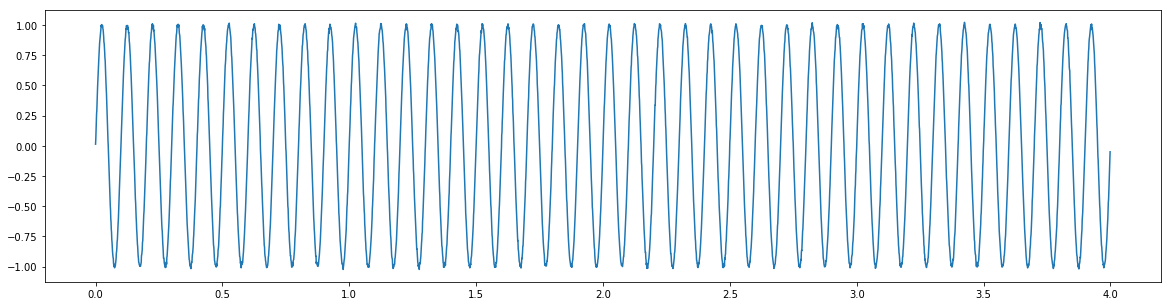

In [58]:
import numpy as np
import matplotlib.pyplot as plt


# データのパラメータ
N = 4000            # サンプル数
dt = 0.001          # サンプリング間隔
f1, f2 = 10, 20    # 周波数
t = np.arange(0, N*dt, dt) # 時間軸
freq = np.linspace(0, 1.0/dt, N) # 周波数軸

# 信号を生成（周波数10の正弦波+周波数20の正弦波+ランダムノイズ）
f = np.sin(2*np.pi*f1*t) + 0.01 * np.random.randn(N)

# 高速フーリエ変換
F = np.fft.fft(f)

# 振幅スペクトルを計算
Amp = np.abs(F)

plt.figure(figsize=(20, 5))
plt.plot(t, f)
plt.show()

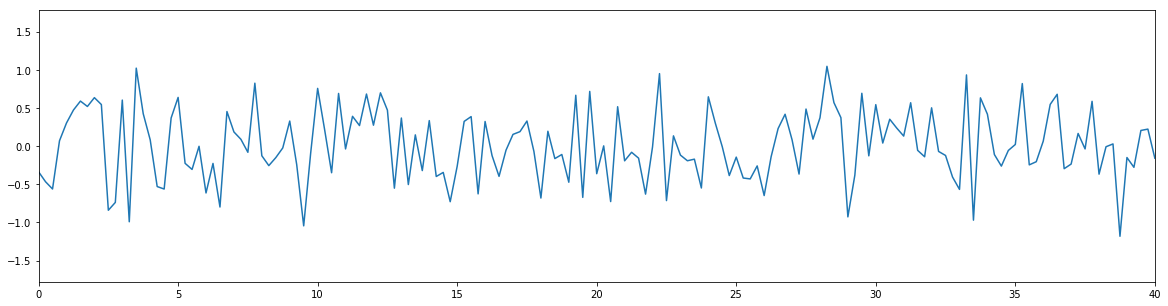

In [59]:
plt.figure(figsize=(20, 5))
plt.xlim(0, 40)
plt.plot(freq, F)